Давыдов ПИм-231 лаба 11 ммо

На основе рассмотренного на занятии Colab-ноутбука (приложен к предыдущему заданию) по распознаванию лиц на фотографиях выполните следующее:

1) загрузите модель из библиотеки Dlib для выделения лица на изображении по 68 ключевым точкам и сверточную нейронную сеть ResNet от Microsoft, специально дообученную для выделения дескрипторов из лиц людей.

2) Подготовьте ряд своих фотографий с указанием примерного возраста, а также фотографии своих родственников, знакомых и т.д. - для определения корректности работы нейронной сети. Требование к фото - одиночные!

3) Выберите одну из своих фотографий в качестве эталона. Остальные фото сравните с эталонной и укажите Евклидово расстояние между двумя дексрипторами лиц, а также результат сопоставления. Ошибается ли сеть? В каких случаях?

4) Загрузите множество фотографий, в том числе групповых снимков. Определите две персоны, например, Вас и кого-то еще, выберите для каждой персоны эталонный снимок. Используя предложенный код, обобщив его на работу с двумя эталонными фотографиями, отберите среди множества фото те, на которых встречаются определенные Вами персоны. Удачи!

In [ ]:
import dlib
from skimage import io # Библиотека для доступа к картинкам
from scipy.spatial import distance # Библиотека для вычисления евклидова расстояния между векторами признаков
import matplotlib.pyplot as plt
from matplotlib.figure import figaspect # Библиотеки для отображения картинок в блокноте

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sp = dlib.shape_predictor('/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('/content/drive/MyDrive/dlib_face_recognition_resnet_model_v1.dat')
detector = dlib.get_frontal_face_detector()

In [ ]:
def shape_of_image(img):
  dets = detector(img, 1)
  for k, d in enumerate(dets):
    #print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        #k, d.left(), d.top(), d.right(), d.bottom()))
    shape = sp(img, d)
  return shape

In [ ]:
def face_descriptor(img):
  return facerec.compute_face_descriptor(img, shape_of_image(img))

In [ ]:
def plot_img(img1, img2):
  height_max = max(img1.shape[1], img2.shape[1])
  width_max = max(img1.shape[0], img2.shape[0])
  fig, ax = plt.subplots(1, 2)
  w, h = figaspect(width_max/(2*height_max))
  fig.set_size_inches(w, h)
  plt.subplot(121),plt.imshow(img1)
  plt.title('Первое фото'), plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(img2)
  plt.title('Второе фото'), plt.xticks([]), plt.yticks([])
  plt.show()

In [ ]:
def dist(face_descriptor1, face_descriptor2):
  a = distance.euclidean(face_descriptor1, face_descriptor2)
  s = 'Один и тот же человек' if a < 0.6 else 'Разные люди'
  print(a, '\n' + s)

In [ ]:
img1 = io.imread('/content/normal.jpg')
img2 = io.imread('/content/formatted.jpg')

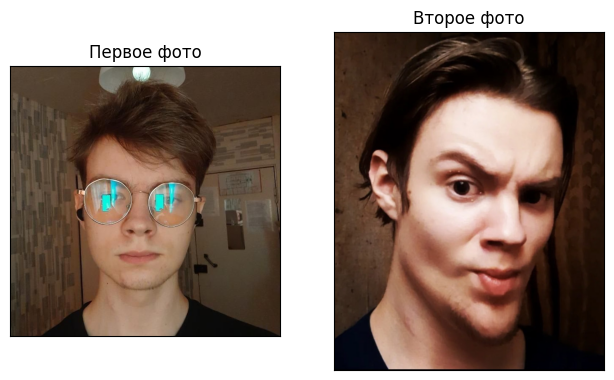

0.5989870785213816 
Один и тот же человек


In [ ]:
plot_img(img1, img2)
dist(face_descriptor(img1), face_descriptor(img2))

На фото мой друг Илья. Первое фото обычное, второе - немного преобразованное каким-то дурацким фильтром.

Не смотря на фильтр, сеть опознала, что на фото один и тот же человек.

In [ ]:
img1 = io.imread('/content/Vova1.jpg')
img2 = io.imread('/content/Vova2.jpg')

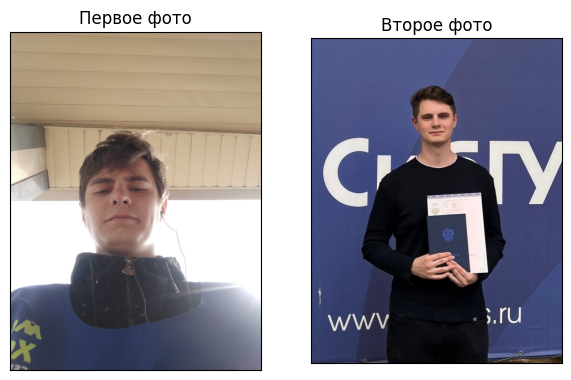

0.5312613259086889 
Один и тот же человек


In [ ]:
plot_img(img1, img2)
dist(face_descriptor(img1), face_descriptor(img2))

На этих фото ещё один мой друг Владимир, и нейросеть также справилась верно.

С коллективными фото не стал делать, не нашел подходящих фотографий, но в целом суть работы понял.